In [1]:
from pathlib import Path
from warnings import simplefilter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib import rcParams
import seaborn as sns

simplefilter('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

plt.style.use('ggplot')
plt.rc('figure',autolayout=True, figsize=(11,4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=18,
    titlepad=10
)

In [2]:
data_dir = Path('../data')

train = pd.read_parquet(
    data_dir / 'train_final.parquet'
)

test = pd.read_parquet(
    data_dir / 'test_final.parquet'
)

ss = pd.read_parquet(
    data_dir / 'submission_sample_final.parquet'
)

''' 
train = train.astype({
    'month' : 'category',
    'devicebrand' : 'category',s
    'carrier' : 'category'
})

test = test.astype({
    'month' : 'category',
    'devicebrand' : 'category',
    'carrier' : 'category'
})

'''

" \ntrain = train.astype({\n    'month' : 'category',\n    'devicebrand' : 'category',s\n    'carrier' : 'category'\n})\n\ntest = test.astype({\n    'month' : 'category',\n    'devicebrand' : 'category',\n    'carrier' : 'category'\n})\n\n"

In [3]:
train.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,VODAFONE TR,Apple,-1.197737,1.113360,-1.123334,-0.263580,2.161242,2.651375,0.810021,1.516175,2.351266,-4.607631,0.678258,-0.555387,3.501726,-0.764794,1.543375,-1.457849,-1.017322,-1.819520,0.725629,-1.443580,1.087103,2.101993,-0.248796,-0.582920,-1.330125,1.407168,1.053509,-1.531511,1.667421,0.250819,-0.090907,2.676460,-0.620866,0.163055,1.720066,-6.139390,-0.302724,2.784268,-3.135499,-3.794420,0.930440,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5"
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,TURKCELL,samsung,-2.336352,2.567766,-0.494908,0.949101,3.567557,3.357848,0.434091,0.885814,1.451937,-3.183905,1.023886,1.165963,2.915730,-1.280556,3.018781,-3.163132,-1.120173,-2.798378,0.287021,-2.029428,0.259852,0.961554,-0.533738,-1.311127,-0.143812,-1.561752,1.930543,-0.942348,-0.000383,-1.372437,1.225360,2.795093,-0.960509,0.113925,1.048365,-5.696538,0.901973,-0.073045,-2.366235,-0.599732,0.815496,-0.983938,-1.453756,-0.021547,-0.195770,2.775513,-0.318980,-4.291473,21,45,"menu7, menu8, menu4"
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561455,2.061736,-0.184511,1.062306,4.197788,1.551181,-0.596218,-0.618501,2.017303,-4.631071,-0.663490,-0.837522,1.821225,-2.171022,3.695091,-0.921562,-2.873224,-2.042132,0.532546,-0.127737,0.450119,2.716429,-0.178209,0.052197,-0.517862,-0.042886,1.156980,-0.527013,-0.088458,-0.497279,1.202904,2.742306,-0.622616,1.756662,2.058538,-5.359065,0.928563,1.133100,-3.099511,-1.253229,1.056681,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4"
3,f2d2b25073ccc298eced86897,10,3532.544,154.509,64.724,TURKCELL,samsung,-2.529918,3.358050,-0.851366,1.643876,2.849205,3.887427,1.854521,0.988186,2.065699,-5.803766,1.931420,0.151038,3.144926,-2.673080,0.377882,-2.656950,-0.378486,-3.275756,0.002770,-0.674196,-0.227111,1.817213,0.068050,-0.786776,-1.707725,-1.999539,1.769581,0.049310,0.229993,-0.303635,1.659189,1.692415,-1.104764,1.242264,2.043422,-3.854030,0.648766,0.944281,-3.026720,-1.823863,0.203653,-1.861418,-1.219658,1.863495,0.213170,1.029710,-1.142185,-4.466191,2,41,"menu6, menu2, menu1"
4,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,VODAFONE TR,samsung,-2.922361,2.096124,0.060796,-1.487557,3.224788,2.091947,-0.992961,0.686043,2.089750,-2.974129,-0.797499,-1.459318,2.397950,-1.308208,3.381416,-2.663701,-2.219488,-1.713531,1.287623,-2.250461,2.345008,0.402893,-0.076522,0.289082,1.847069,1.423561,1.888181,-1.022260,1.021054,-0.843386,-0.859217,2.565366,0.412179,0.067829,0.391379,-5.995943,2.675444,0.203494,-3.272419,-1.417781,2.188403,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8"


In [4]:
test.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,2e6105f5911256f4f6c4813ed,1,6893.544,246.854,242.636,VODAFONE TR,samsung,-1.723524,3.216489,-1.138474,2.026997,2.241670,1.796100,-0.212805,0.447929,3.465160,-4.219648,-0.931751,3.633603,-0.555067,-2.298111,0.511194,-0.383306,-2.593233,-2.447223,0.924127,-0.411446,0.246188,2.257871,3.599789,-1.497506,0.516612,0.663096,1.871465,0.861411,-1.024769,-2.006591,0.209522,-0.097602,-2.985843,-0.042177,3.813231,-4.685382,-0.249806,2.276780,-0.367957,-1.724633,-1.094519,-1.217407,-4.280456,1.512240,-2.306445,2.066388,0.844927,-1.026193,18,58
1,c56ad71dae0a5dbd3e7d36adc,1,4481.065,740.209,263.860,TURKCELL,Apple,-0.417275,2.024433,0.102952,-1.634336,3.621519,1.506006,1.993639,0.434495,0.705718,-3.248426,-0.745330,-0.761663,3.166748,1.194949,3.198201,-0.674974,-0.555677,-1.829533,-1.155211,-1.771030,2.684586,0.857986,-0.147427,0.130127,0.207778,0.971870,0.356150,-3.598074,1.380936,-1.654721,-0.317826,2.263550,-0.277017,0.788620,-1.020164,-6.363883,0.656803,0.664108,-2.564899,-1.020139,1.806486,-3.477517,-2.064966,1.499805,1.284697,0.189269,-1.563224,-1.901654,3,35
2,4d02ea175f6581f0c6385311f,1,4340.702,2742.163,318.700,TURKCELL,samsung,-2.943294,2.769536,0.734942,1.681471,3.229447,2.711587,1.075506,0.104691,1.275551,-4.784873,-0.621247,0.928116,2.831212,-0.419810,3.244250,-1.674474,-2.556517,-2.589562,-0.821467,-0.831514,0.728772,2.415584,-1.964435,0.120592,-0.610942,-1.603177,0.148732,-1.516807,1.761628,-1.741026,0.819192,2.675048,-0.724420,0.716200,0.686554,-5.850377,0.464842,1.287392,-0.684942,-2.195384,1.759080,-2.038839,-2.067219,2.141083,0.055355,0.084739,-1.009925,-2.058473,7,50
3,3412d27a86c286ba078fa935c,1,4129.666,181.397,155.423,TURK TELEKOM,Apple,-2.346902,2.684752,0.168206,-1.072321,4.971480,1.386910,0.515737,0.621610,-0.354368,-2.958280,-1.215555,-1.326045,2.019457,-0.829898,4.686781,-2.994842,-2.031204,-1.832882,-0.959937,-2.212131,1.964668,0.470133,-0.860664,-0.312078,1.205403,-0.672658,1.095291,-0.621464,0.803356,-2.377215,-0.371055,3.786268,-0.030495,0.883739,-0.861583,-5.115179,1.867099,-0.372760,-1.930334,-1.264293,2.171847,-0.925040,-1.484278,0.666036,0.911519,0.616167,0.092304,-1.874706,22,47
4,0203b561f6f7e10eafa46eefa,1,3903.944,126.133,100.060,TURKCELL,POCO,-1.745354,2.355863,0.318961,-0.570734,4.056542,2.005356,0.515711,1.297831,0.468840,-4.917929,-1.603623,-1.475862,2.009840,-0.815374,3.730217,-1.009404,-2.430358,-1.781647,-0.569731,-2.180424,1.448957,1.125873,0.684027,0.001094,0.959921,0.682983,0.880568,-1.494863,-0.546022,-0.780245,0.165660,2.890538,-0.308851,1.651937,0.845600,-6.147421,1.067847,1.000501,-3.929198,-0.657711,-0.373413,-0.015773,-2.961445,1.301413,1.375090,-0.107355,0.924390,-1.606419,29,52


In [5]:
print(f'Train set shape : {train.shape} Test set shape : {test.shape}')

Train set shape : (94049, 58) Test set shape : (11955, 57)


In [6]:
train.describe()

,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000
mean,11.311561,432.781818,197.904016,102.381759,-1.824932,1.948002,-0.014231,-0.270988,3.428983,2.314612,0.755425,0.548228,0.833412,-3.767522,-0.369005,-0.589353,2.821010,-0.905132,3.181226,-1.994700,-1.851954,-2.106079,0.050925,-1.665830,1.556449,1.147143,-0.630579,-0.222904,0.618776,-0.022954,1.236582,-1.333063,0.647161,-1.053488,0.350096,3.011839,-0.205500,0.716313,0.113462,-5.909519,1.244454,0.653498,-2.859309,-1.196948,1.055930,-1.247314,-1.863433,1.042226,0.260601,0.737817,-0.683078,-2.333848,20.531978,50.843943
std,0.732301,429.834018,169.474603,80.533643,0.706014,0.742521,0.855615,1.001878,0.886168,0.765429,0.693982,0.661974,0.841732,0.889535,0.765716,1.139881,0.811651,0.723011,0.757027,0.722838,0.754639,0.621185,0.896424,0.826646,0.828227,1.068714,0.838008,0.610597,0.801722,0.988039,0.903148,0.850496,0.747731,0.773743,0.989794,0.756453,0.681084,0.686690,0.905281,0.606830,0.740334,0.793515,0.746946,0.944416,0.745859,0.767093,0.812613,0.910212,0.797621,0.837250,0.858325,0.642435,8.310330,12.950021
min,10.000000,41.850000,40.231000,40.001000,-5.009604,-1.190684,-4.988702,-4.205721,-2.057158,-1.572397,-4.834940,-2.195450,-3.326162,-8.526143,-3.954992,-4.934422,-2.087638,-4.598442,-1.022491,-5.366724,-5.337937,-4.869550,-3.615648,-5.573031,-2.597264,-3.060436,-4.513334,-3.731376,-3.401492,-4.252494,-3.384988,-4.768601,-3.561114,-4.438785,-5.986885,-2.505686,-4.364327,-4.297767,-4.068053,-8.035002,-1.788131,-2.525164,-6.736732,-6.033741,-3.565546,-4.956211,-6.151754,-3.265827,-3.735571,-3.631153,-4.166801,-5.680349,1.000000,20.000000
25%,11.000000,181.540000,91.886000,53.746000,-2.290048,1.443627,-0.560076,-0.950880,2.891524,1.805311,0.325458,0.105707,0.273083,-4.336629,-0.878516,-1.368981,2.289633,-1.376837,2.715526,-2.484966,-2.352533,-2.516640,-0.556159,-2.223632,1.043992,0.387469,-1.210363,-0.623985,0.106125,-0.657601,0.715286,-1.902450,0.154396,-1.578479,-0.295642,2.564092,-0.640254,0.279917,-0.502068,-6.324248,0.749599,0.107629,-3.353120,-1.814194,0.587355,-1.736227,-2.396253,0.431905,-0.252991,0.161747,-1.279131,-2.753271,15.000000,41.000000
50%,11.000000,306.947000,144.874000,75.415000,-1.840876,1.934019,0.005703,-0.337732,3.503459,2.316267,0.789183,0.522654,0.778152,-3.710846,-0.380670,-0.660989,2.822833,-0.900123,3.221436,-2.014989,-1.859750,-2.117834,0.028713,-1.668727,1.620061,1.100946,-0.657115,-0.217941,0.646296,-0.031584,1.306397,-1.379233,0.661017,-1.081342,0.330914,3.072178,-0.188643,0.744142,0.077198,-5.966711,1.232363,0.613911,-2.879117,-1.210771,1.093342,-1.219592,-1.865288,1.037332,0.285148,0.703326,-0.703813,-2.327645,21.000000,50.000000
75%,12.000000,537.064000,241.504000,119.032000,-1.379623,2.431059,0.559322,0.330430,4.050990,2.82511

In [7]:
test.describe()

,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,11955.0,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000
mean,1.0,356.068895,169.745649,92.867835,-1.798281,2.031999,0.016078,-0.228809,3.388417,2.504509,0.680192,0.559495,1.055679,-3.748254,-0.224535,-0.526187,2.679002,-0.993754,3.184881,-2.019226,-1.815757,-2.098100,-0.012196,-1.667567,1.553721,1.068414,-0.634524,-0.110221,0.591416,-0.044032,1.270652,-1.361222,0.550663,-1.173896,0.195975,2.993211,-0.098256,0.756152,0.180492,-5.986224,1.135555,0.695390,-2.813323,-1.341784,1.129112,-1.217364,-1.888709,1.170828,0.307357,0.525849,-0.653697,-2.325561,20.705897,51.926809
std,0.0,315.305326,137.378610,69.110786,0.701532,0.736496,0.811839,0.969308,0.860674,0.746671,0.682653,0.653672,0.811264,0.884864,0.746451,1.155094,0.795884,0.727430,0.759332,0.708472,0.741947,0.618040,0.866335,0.846525,0.822254,1.111506,0.838915,0.605678,0.779697,0.984133,0.909420,0.885166,0.707244,0.718171,0.976647,0.745915,0.659682,0.678245,0.852931,0.587732,0.715479,0.774918,0.739568,0.914771,0.723230,0.748210,0.770272,0.890796,0.756098,0.785094,0.881584,0.635836,8.532393,13.489314
min,1.0,45.802000,40.338000,40.001000,-4.661205,-0.644043,-3.622096,-3.502686,-1.246851,-0.923135,-2.748580,-1.903355,-1.451831,-7.495743,-3.532068,-5.509178,-0.555067,-4.114161,-0.658757,-5.535741,-4.701209,-5.406067,-3.648206,-4.981859,-2.733389,-2.423688,-3.539177,-2.772497,-2.700170,-3.961275,-3.345922,-4.195966,-2.914045,-3.878035,-5.001739,-1.249355,-2.994311,-3.931573,-3.633232,-7.730404,-1.621415,-2.086433,-5.401817,-5.923442,-2.375533,-4.559577,-4.951508,-2.741043,-2.919687,-2.621063,-3.900280,-4.877974,1.000000,20.000000
25%,1.0,160.702500,85.166000,51.363500,-2.263956,1.533961,-0.508738,-0.885191,2.856143,2.006101,0.250019,0.122828,0.506892,-4.319155,-0.723732,-1.325311,2.147155,-1.472959,2.710345,-2.497129,-2.308441,-2.504971,-0.603306,-2.240295,1.027936,0.281899,-1.218348,-0.506264,0.074659,-0.687964,0.747914,-1.963970,0.080241,-1.658919,-0.462606,2.566713,-0.519044,0.339788,-0.395947,-6.392825,0.661748,0.162434,-3.307932,-1.943078,0.667405,-1.687849,-2.386102,0.572045,-0.165157,-0.012304,-1.277870,-2.734042,15.000000,42.000000
50%,1.0,266.397000,127.417000,70.409000,-1.818060,2.018876,0.032225,-0.299804,3.468259,2.506612,0.713269,0.528414,0.996646,-3.695034,-0.244959,-0.620352,2.682495,-0.988473,3.226089,-2.046061,-1.820519,-2.104845,-0.028796,-1.669974,1.608253,0.987452,-0.655464,-0.112149,0.607165,-0.045761,1.353522,-1.402925,0.551741,-1.190646,0.156239,3.055447,-0.070528,0.782515,0.157477,-6.035179,1.122681,0.649027,-2.840766,-1.348769,1.162207,-1.191842,-1.877581,1.162670,0.336571,0.486935,-0.678628,-2.317191,21.000000,52.000000
75%,1.0,449.927000,206.826000,106.705000,-1.354536,2.513030,0.560742,0.344927,4.003024,3.006767,1.140305,0.959055,1.538137,-3.116774,

#### NaN Analysis

In [8]:
def nan_table(df):
    return pd.DataFrame(
        [
            (
                col,
                df[df[col].isna()].shape[0],
                df[df[col].isna()].shape[0] / df.shape[0]
            )
            for col in df.columns
        ],
        columns=['column','nan_count','nan_ratio']
    )

cm = sns.light_palette('blue', as_cmap=True)

In [9]:
print('Train set NaN table')
nan_df = nan_table(train)
display(nan_df.sort_values(by='nan_count',ascending=False).style.background_gradient(cmap=cm))

Train set NaN table


,column,nan_count,nan_ratio
0,id,0,0.000000
43,feature_36,0,0.000000
31,feature_24,0,0.000000
32,feature_25,0,0.000000
33,feature_26,0,0.000000
34,feature_27,0,0.000000
35,feature_28,0,0.000000
36,feature_29,0,0.000000
37,feature_30,0,0.000000
38,feature_31,0,0.000000


In [10]:
print('Test set NaN table')
nan_df = nan_table(test)
display(nan_df.sort_values(by='nan_count',ascending=False).style.background_gradient(cmap=cm))

Test set NaN table


,column,nan_count,nan_ratio
0,id,0,0.000000
29,feature_22,0,0.000000
31,feature_24,0,0.000000
32,feature_25,0,0.000000
33,feature_26,0,0.000000
34,feature_27,0,0.000000
35,feature_28,0,0.000000
36,feature_29,0,0.000000
37,feature_30,0,0.000000
38,feature_31,0,0.000000


In [11]:
unique_menus = ['menu' + str(i) for i in range(1,10)]

temp_df = pd.concat([
    train,
    pd.DataFrame(0,columns=unique_menus, index=train.index)
],axis=1)


for i,row in temp_df.iterrows():
    menus = row['target'].split(', ')
    for menu in menus:
        if menu in unique_menus:
            temp_df.loc[i,menu] = 1

temp_df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target,menu1,menu2,menu3,menu4,menu5,menu6,menu7,menu8,menu9
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,VODAFONE TR,Apple,-1.197737,1.113360,-1.123334,-0.263580,2.161242,2.651375,0.810021,1.516175,2.351266,-4.607631,0.678258,-0.555387,3.501726,-0.764794,1.543375,-1.457849,-1.017322,-1.819520,0.725629,-1.443580,1.087103,2.101993,-0.248796,-0.582920,-1.330125,1.407168,1.053509,-1.531511,1.667421,0.250819,-0.090907,2.676460,-0.620866,0.163055,1.720066,-6.139390,-0.302724,2.784268,-3.135499,-3.794420,0.930440,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5",0,1,0,1,1,0,0,0,0
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,TURKCELL,samsung,-2.336352,2.567766,-0.494908,0.949101,3.567557,3.357848,0.434091,0.885814,1.451937,-3.183905,1.023886,1.165963,2.915730,-1.280556,3.018781,-3.163132,-1.120173,-2.798378,0.287021,-2.029428,0.259852,0.961554,-0.533738,-1.311127,-0.143812,-1.561752,1.930543,-0.942348,-0.000383,-1.372437,1.225360,2.795093,-0.960509,0.113925,1.048365,-5.696538,0.901973,-0.073045,-2.366235,-0.599732,0.815496,-0.983938,-1.453756,-0.021547,-0.195770,2.775513,-0.318980,-4.291473,21,45,"menu7, menu8, menu4",0,0,0,1,0,0,1,1,0
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561455,2.061736,-0.184511,1.062306,4.197788,1.551181,-0.596218,-0.618501,2.017303,-4.631071,-0.663490,-0.837522,1.821225,-2.171022,3.695091,-0.921562,-2.873224,-2.042132,0.532546,-0.127737,0.450119,2.716429,-0.178209,0.052197,-0.517862,-0.042886,1.156980,-0.527013,-0.088458,-0.497279,1.202904,2.742306,-0.622616,1.756662,2.058538,-5.359065,0.928563,1.133100,-3.099511,-1.253229,1.056681,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4",0,1,0,1,0,0,0,1,0
3,f2d2b25073ccc298eced86897,10,3532.544,154.509,64.724,TURKCELL,samsung,-2.529918,3.358050,-0.851366,1.643876,2.849205,3.887427,1.854521,0.988186,2.065699,-5.803766,1.931420,0.151038,3.144926,-2.673080,0.377882,-2.656950,-0.378486,-3.275756,0.002770,-0.674196,-0.227111,1.817213,0.068050,-0.786776,-1.707725,-1.999539,1.769581,0.049310,0.229993,-0.303635,1.659189,1.692415,-1.104764,1.242264,2.043422,-3.854030,0.648766,0.944281,-3.026720,-1.823863,0.203653,-1.861418,-1.219658,1.863495,0.213170,1.029710,-1.142185,-4.466191,2,41,"menu6, menu2, menu1",1,1,0,0,0,1,0,0,0
4,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,VODAFONE TR,samsung,-2.922361,2.096124,0.060796,-1.487557,3.224788,2.091947,-0.992961,0.686043,2.089750,-2.974129,-0.797499,-1.459318,2.397950,-1.308208,3.381416,-2.663701,-2.219488,-1.713531,1.287623,-2.250461,2.345008,0.402893,-0.076522,0.289082,1.847069,1.423561,1.888181,-1.022260,1.021054,-0.843386,-0.859217,2.565366,0.412179,0.067829,0.391379,-5.995943,2.675444,0.203494,-3.272419,-1.417781,2.188403,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8",0,1,0,0,0,1,0,1,0


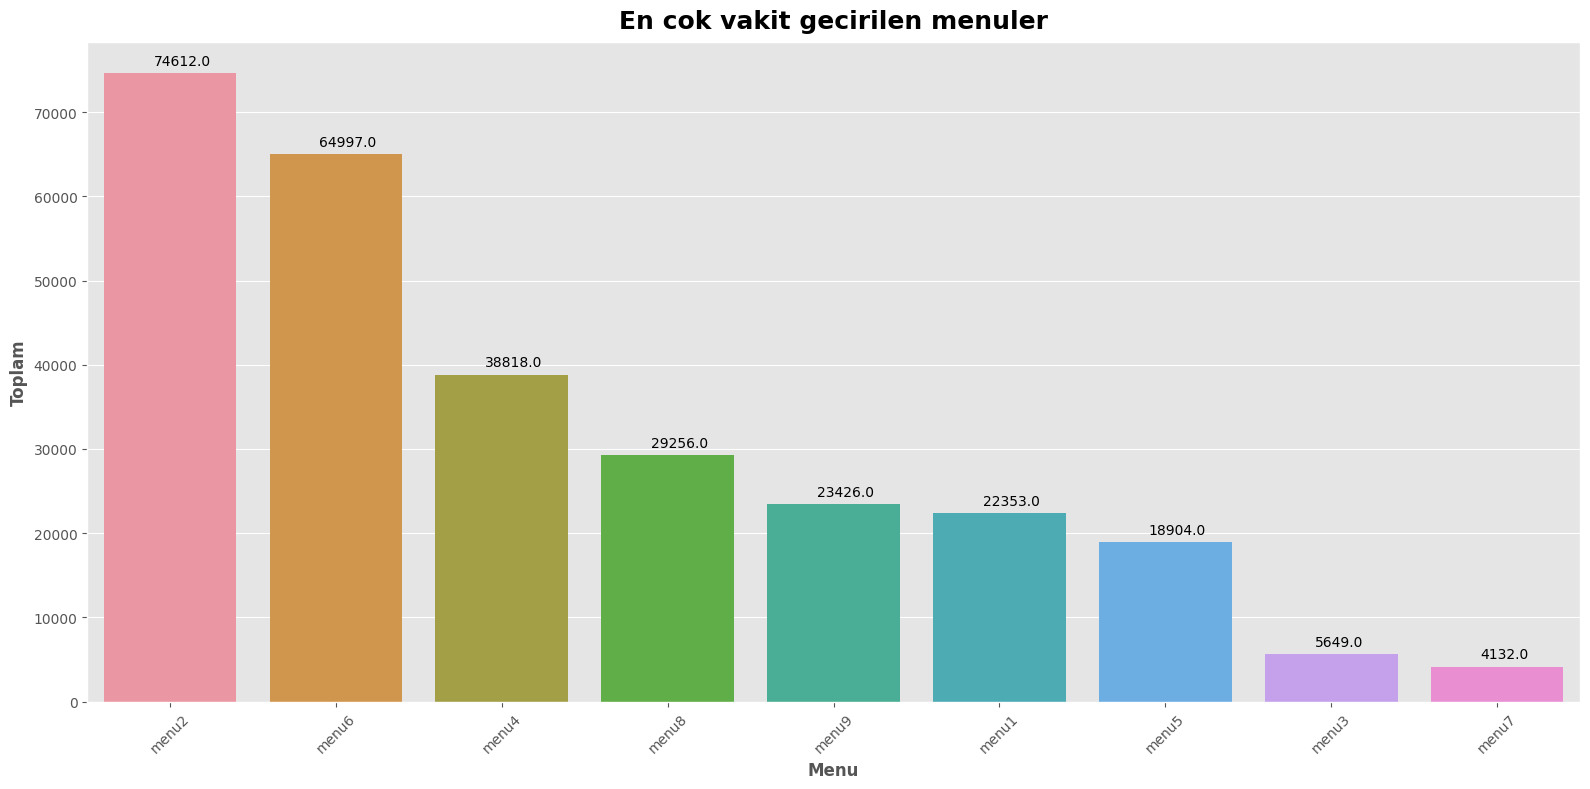

In [12]:
temp = temp_df[unique_menus].sum().sort_values(ascending=False).reset_index().rename(columns={'index' : 'menu', 0 : 'sum'})

plt.figure(figsize=(16,8))
ax = sns.barplot(x = 'menu', y='sum', data=temp)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height() + 1000))

plt.title('En cok vakit gecirilen menuler')
plt.xlabel('Menu')
plt.ylabel('Toplam')
plt.xticks(rotation=45)
plt.show()

#### Numerik degisken Analizi

##### Dagilimlar

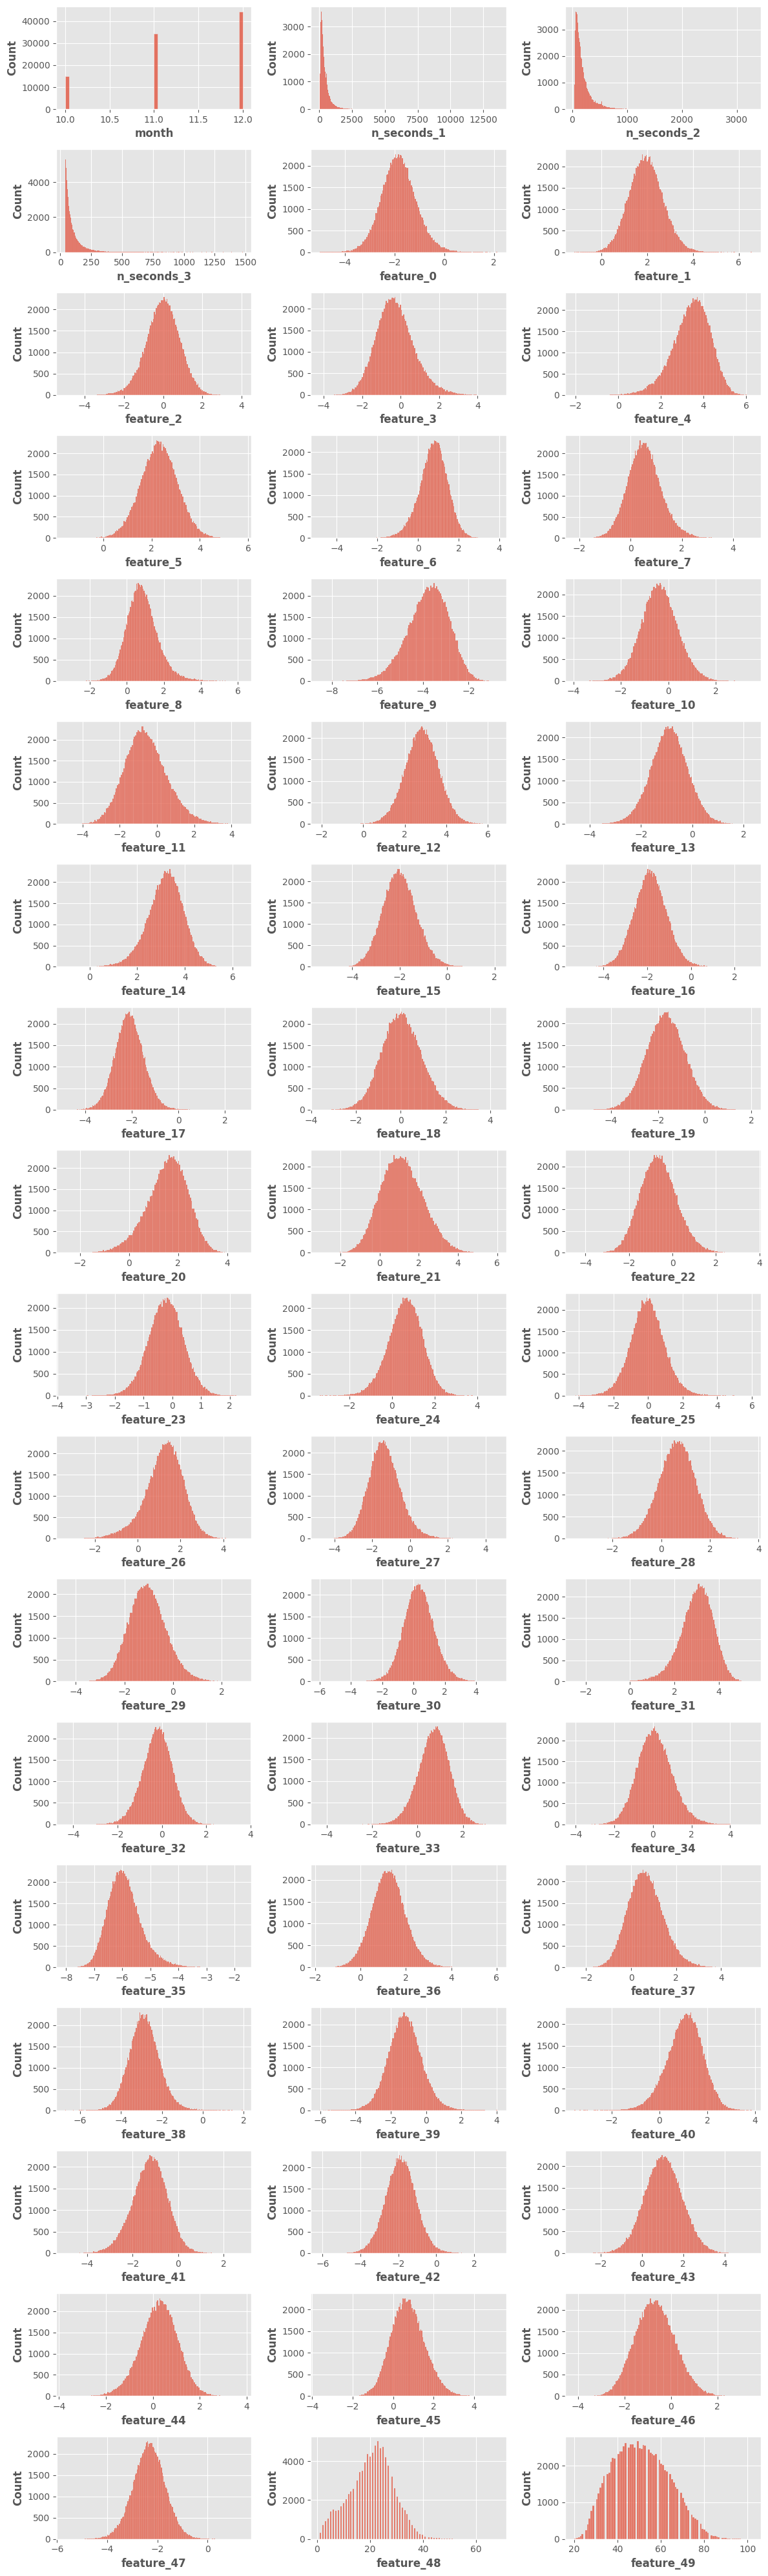

In [13]:
num_cols = list(train.select_dtypes(include=['int','float']).columns)

fig, axes = plt.subplots(18,3, figsize=(12,40))

for col,ax in zip(num_cols,axes.flat):
    sns.histplot(data=train, x=col, ax=ax)

* Dagilimlara bakarak feature_49 degiskeninin yas degiskeni oldugunu soyleyebiliriz.

##### Korelasyon

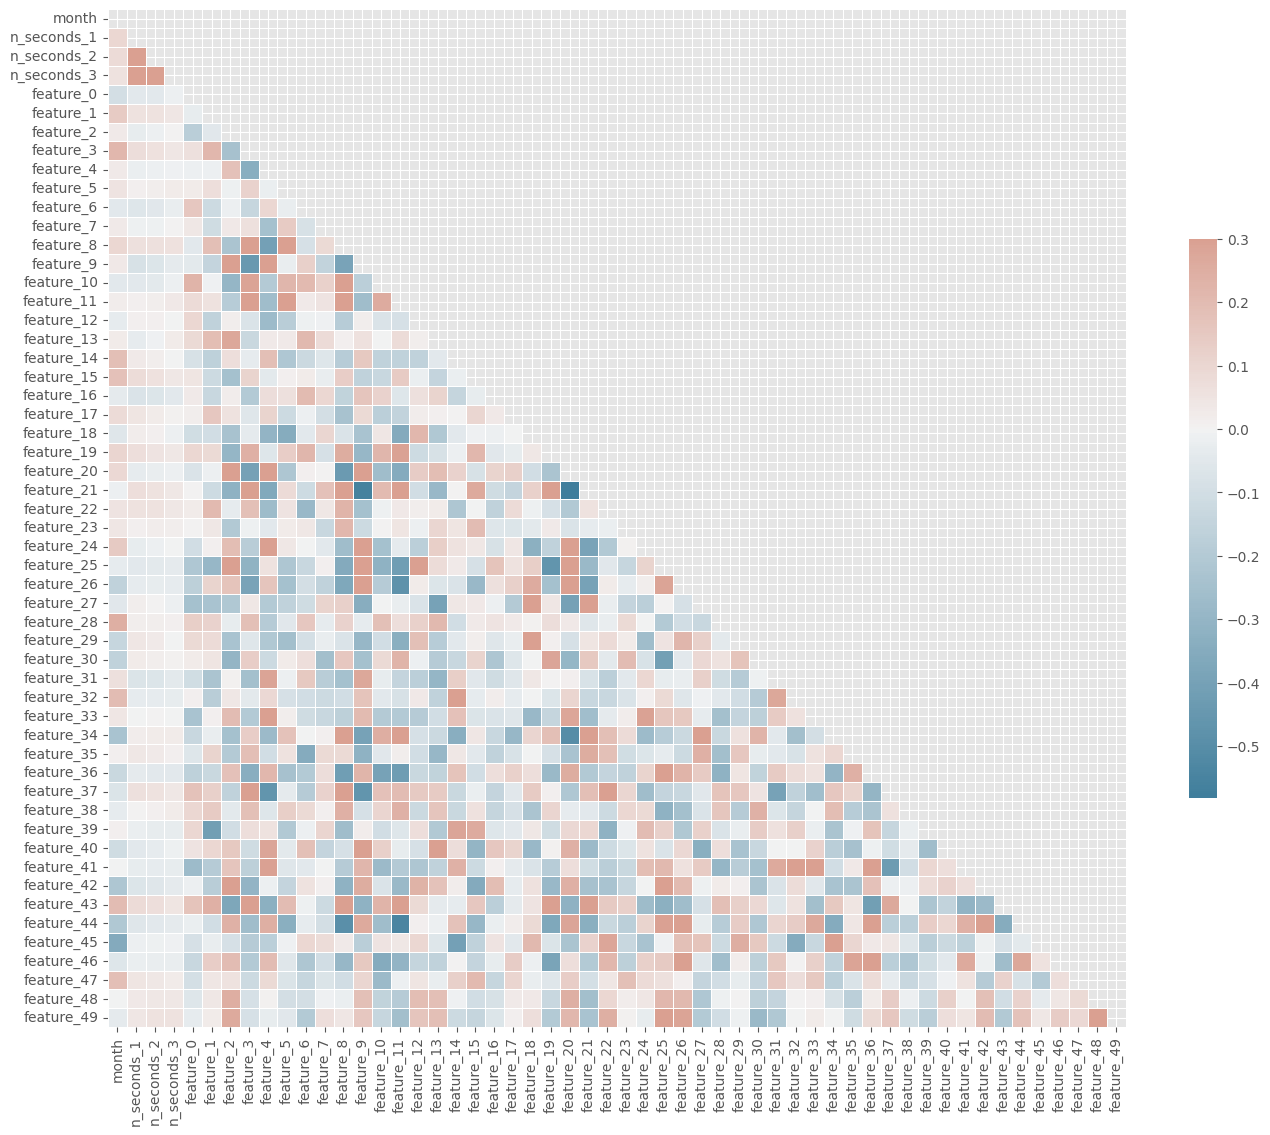

In [14]:
corr = train[num_cols].corr()

mask = np.triu(np.ones_like(num_cols,dtype=bool))

fig, ax = plt.subplots(figsize=(14,12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={'shrink' : .5}
)

plt.show()

#### Yas Degiskeni

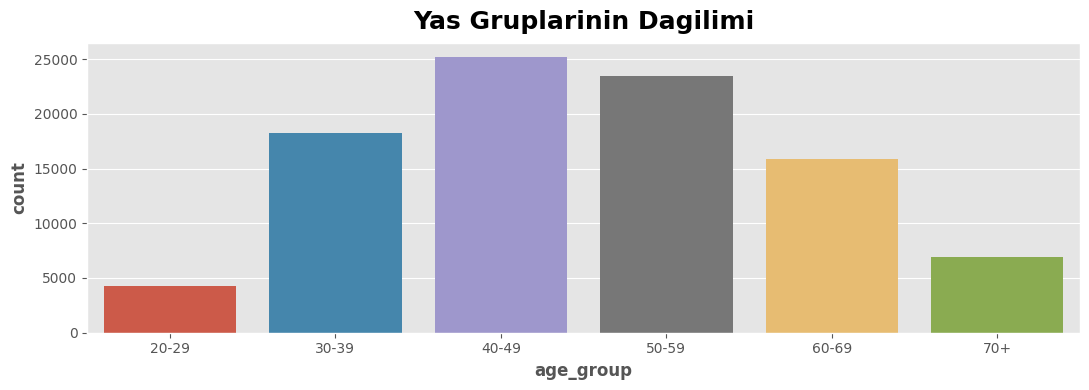

In [15]:
temp_df.rename(columns={'feature_49' : 'age'}, inplace=True)

bins = [20,30,40,50,60,70,120]
labels = ['20-29','30-39','40-49','50-59','60-69','70+']
temp_df['age_group'] = pd.cut(temp_df.age, bins, labels=labels, include_lowest=True)

temp = temp_df['age_group'].value_counts().sort_values(ascending=False).reset_index()

sns.barplot(data=temp, x='age_group', y='count')

plt.title('Yas Gruplarinin Dagilimi')
plt.show()

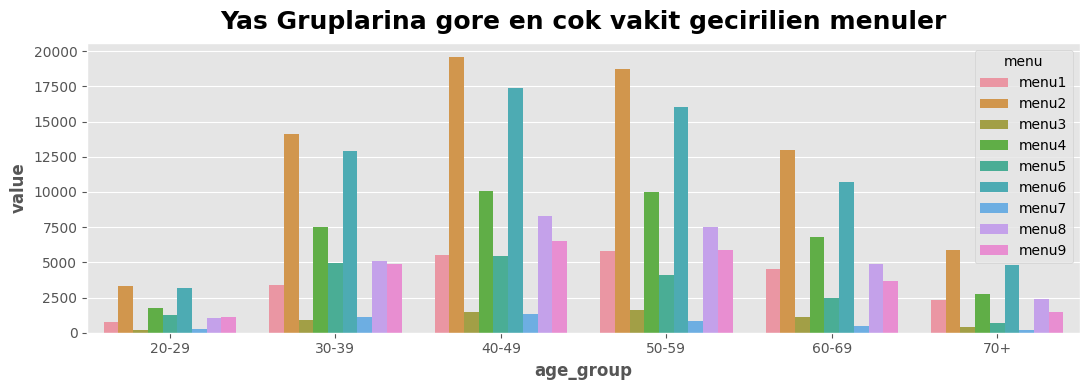

In [16]:
temp = temp_df.groupby('age_group')[unique_menus].sum()
temp = temp.stack().to_frame('value').reset_index()
temp.rename(columns={'level_1' : 'menu'},inplace=True)

sns.barplot(data=temp, x='age_group', y='value', hue='menu')

plt.title("Yas Gruplarina gore en cok vakit gecirilien menuler")
plt.show()


#### Kategorik Degisken Analizi

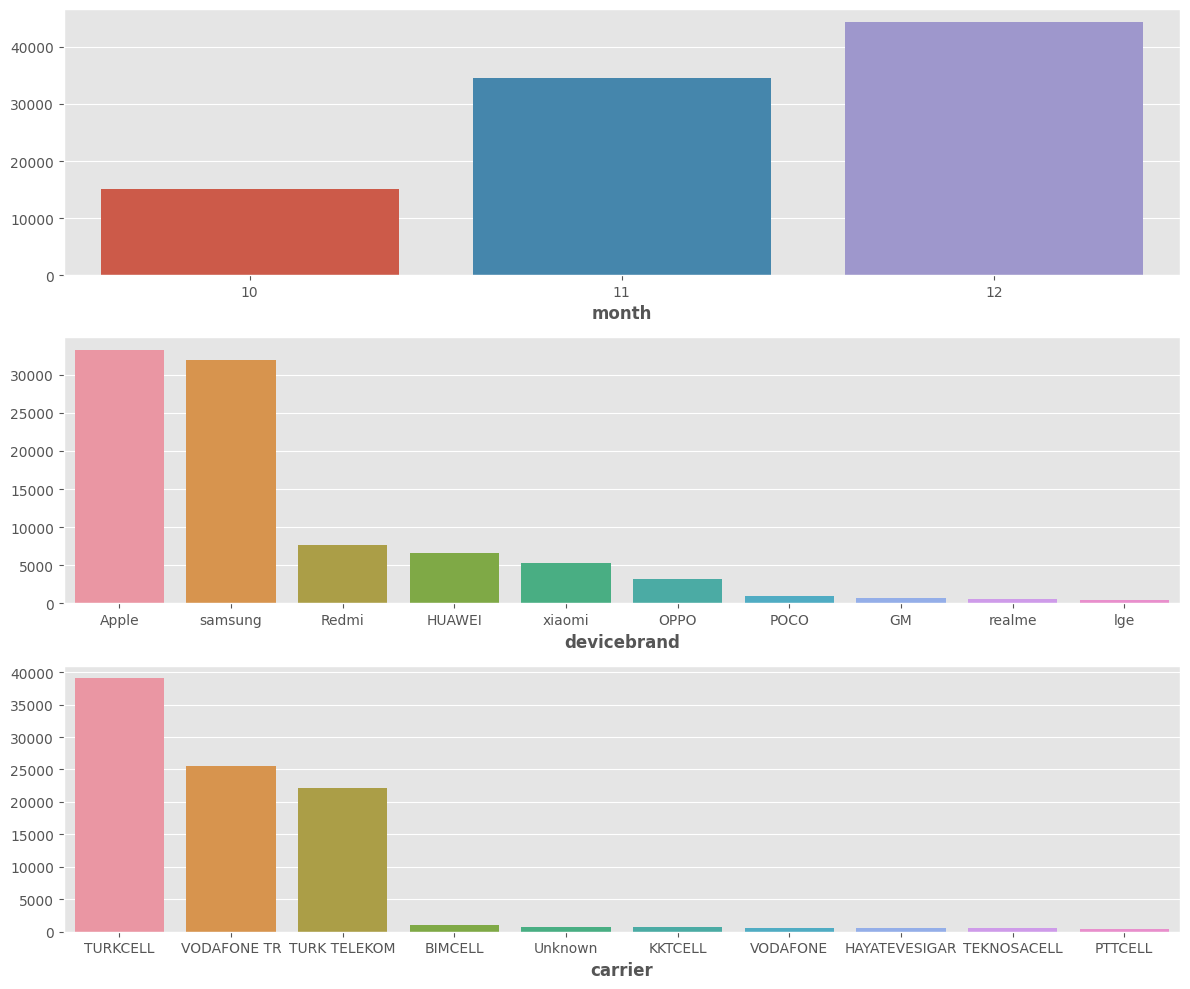

In [17]:
fig,axes = plt.subplots(3,1,figsize=(12,10))
cat_cols = ['month','devicebrand','carrier']
n_largest= 10

for col,ax in zip(cat_cols,axes):
    val_counts = train[col].value_counts().nlargest(n_largest)
    sns.barplot(
        x = val_counts.index,
        y = val_counts.values,
        ax = ax
    )


plt.show()